<a href="https://colab.research.google.com/github/honehaniwa/Gasyori100knock/blob/main/Question21_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

# 便利そうな関数を先に作っとく

def show(img):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def figure(img):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
    fig.show()


!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg

--2021-04-07 18:39:34--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_01_10/imori.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12638 (12K) [image/jpeg]
Saving to: ‘imori.jpg’

imori.jpg           100%[===================>]  12.34K  --.-KB/s    in 0s      

2021-04-07 18:39:35 (58.5 MB/s) - ‘imori.jpg’ saved [12638/12638]

--2021-04-07 18:39:35--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_11_20/imori_dark.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5941

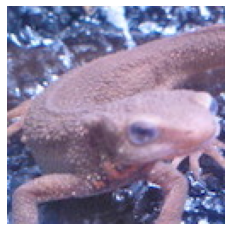

In [3]:
img_orig = cv2.imread("imori.jpg")
show(img_orig)

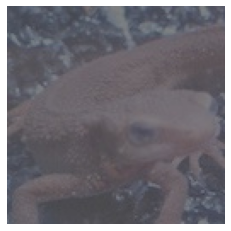

In [4]:
img_dark = cv2.imread("imori_dark.jpg")
show(img_dark)

#Q.21. ヒストグラム正規化
Histogram normalization
ヒストグラム正規化を実装せよ。

ヒストグラムは偏りを持っていることが伺える。 例えば、0に近い画素が多ければ画像は全体的に暗く、255に近い画素が多ければ画像は明るくなる。 ヒストグラムが局所的に偏っていることをダイナミックレンジが狭いなどと表現する。 そのため画像を人の目に見やすくするために、ヒストグラムを正規化したり平坦化したりなどの処理が必要である。

このヒストグラム正規化は濃度階調変換(gray-scale transformation) と呼ばれ、[c,d]の画素値を持つ画像を[a,b]のレンジに変換する場合は次式で実現できる。 今回はimori_dark.jpgを[0, 255]のレンジにそれぞれ変換する。

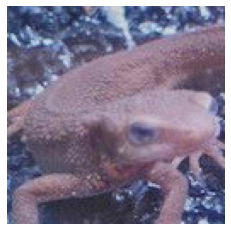

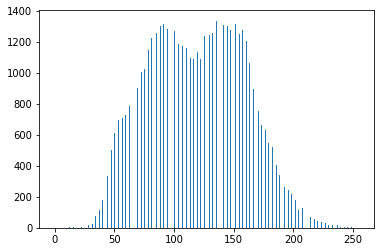

In [ ]:
def Histogram_normalization(img, a=0, b=255):
    c = img.min()
    d = img.max()

    out = img.copy()

    out = (b-a) / (d-c) * (out - c) + a
    out = (np.clip(out, a, b)).astype(np.uint8)

    return out

out = Histogram_normalization(img_dark)
show(out)
figure(out)

#Q.22. ヒストグラム操作
ヒストグラムの平均値をm0=128、標準偏差をs0=52になるように操作せよ。

これはヒストグラムのダイナミックレンジを変更するのではなく、ヒストグラムを平坦に変更する操作である。

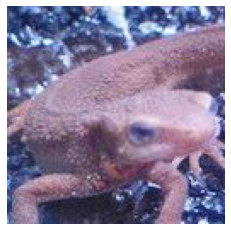

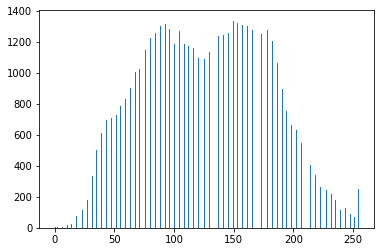

In [ ]:
def Histogram_edit(img, m0=128, s0=52):
    m = np.mean(img)
    s = np.std(img)

    out = img.copy()

    out = s0 / s * (out - m) + m0
    out = (np.clip(out, 0, 255)).astype(np.uint8)

    return out

out = Histogram_edit(img_dark)
show(out)
figure(out)

# Q.23. ヒストグラム平坦化
Histogram equalization
ヒストグラム平坦化を実装せよ。

ヒストグラム平坦化とはヒストグラムを平坦に変更する操作であり、上記の平均値や標準偏差などを必要とせず、ヒストグラム値を均衡にする操作である。

## お気持ち参考
https://qiita.com/Dason08/items/1b28e24d12630182fd69


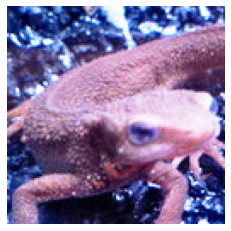

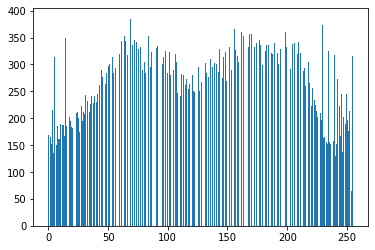

In [ ]:
def Histogram_equalization(img, z_max=255):
    h, w, c = img.shape
    s = h * w * c
    out = img.copy()

    sum = 0.

    for i in range(1, 255):
        index = np.where(img == i)
        sum += len(img[index])
        z_prime = z_max / s * sum
        out[index] = z_prime

    out = (np.clip(out, 0, 255)).astype(np.uint8)
    return out

out = Histogram_equalization(img_orig)
show(out)
figure(out)

# Q.24. ガンマ補正
Gamma correction

imori_gamma.jpgに対してガンマ補正(c=1, g=2.2)を実行せよ。

ガンマ補正とは、カメラなどの媒体の経由によって画素値が非線形的に変換された場合の補正である。 ディスプレイなどで画像をそのまま表示すると画面が暗くなってしまうため、RGBの値を予め大きくすることで、ディスプレイの特性を排除した画像表示を行うことがガンマ補正の目的である。

In [ ]:
!wget https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_21_30/imori_gamma.jpg

--2021-04-06 15:57:40--  https://raw.githubusercontent.com/yoyoyo-yo/Gasyori100knock/master/Question_21_30/imori_gamma.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11028 (11K) [image/jpeg]
Saving to: ‘imori_gamma.jpg’

imori_gamma.jpg     100%[===================>]  10.77K  --.-KB/s    in 0s      

2021-04-06 15:57:40 (66.7 MB/s) - ‘imori_gamma.jpg’ saved [11028/11028]



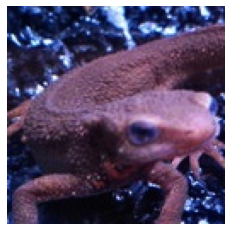

In [ ]:
img_gamma = cv2.imread("imori_gamma.jpg")
show(img_gamma)

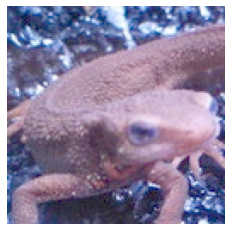

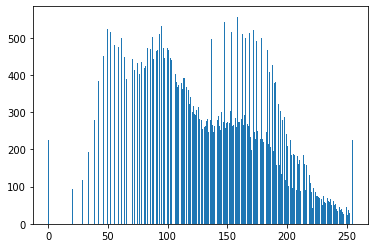

In [ ]:
def Gamma_correction(img, c=1, g=2.2):
    out = img.copy().astype(np.float)
    out /= 255.

    out = (1/c * out) ** (1/g)

    out *= 255

    out = (np.clip(out, 0, 255)).astype(np.uint8)
    
    return out

out = Gamma_correction(img_gamma)
show(out)
figure(out)

# Q.25. 最近傍補間
最近傍補間により画像を1.5倍に拡大せよ。

最近傍補間(Nearest Neighbor)は画像の拡大時に最近傍にある画素をそのまま使う手法である。 シンプルで処理速度が速いが、画質の劣化は著しい。

次式で補間される。 I' ... 拡大後の画像、 I ... 拡大前の画像、a ... 拡大率、[ ] ... 四捨五入

(128, 128, 3) (192, 192, 3)


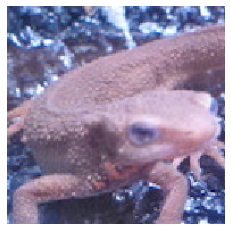

In [ ]:
def Nearest_Neighbor(img, ax = 1.5):
    h, w, c = img.shape
    
    nh = int(h * ax)
    nw = int(w * ax)

    out = np.zeros((nh, nw, c), dtype=np.float)

    for x in range(nh):
        for y in range(nw):
            for cc in range(c):
                out[y, x, cc] = img[int(y//ax), int(x//ax), cc]
    out = (np.clip(out, 0, 255)).astype(np.uint8)
    return out

out = Nearest_Neighbor(img_orig)
print(img_orig.shape, out.shape)
show(out)

# Q.26. Bi-linear補間
Bi-linear補間により画像を1.5倍に拡大せよ。

Bi-linear補間とは周辺の４画素に距離に応じた重みをつけることで補完する手法である。 計算量が多いだけ処理時間がかかるが、画質の劣化を抑えることができる。

1.拡大画像の座標(x', y')を拡大率aで割り、floor(x'/a, y'/a)を求める。
2.元画像の(x'/a, y'/a)の周囲4画素、I(x,y), I(x+1,y), I(x,y+1), I(x+1, y+1)を求める

(128, 128, 3) (192, 192, 3)


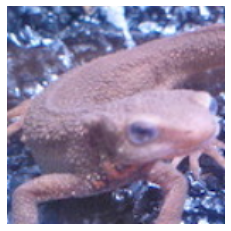

In [ ]:
def Bi_linear(img, ax = 1.5, ay = 1.5):
    h, w, c = img.shape

    ah = int(ay * h)
    aw = int(ax * w)

    y = np.arange(ah).repeat(aw).reshape(ah, -1)
    x = np.tile(np.arange(aw), (ah, 1))

    y = (y / ay)
    x = (x / ax)

    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)

    ix = np.minimum(ix, w-2)
    iy = np.minimum(iy, h-2)

    dx = x - ix
    dy = y - iy

    dx = np.repeat(np.expand_dims(dx, axis=-1), 3, axis=-1)
    dy = np.repeat(np.expand_dims(dy, axis=-1), 3, axis=-1)
    
    out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

    out = (np.clip(out, 0, 255)).astype(np.uint8)
    return out

out = Bi_linear(img_orig)
print(img_orig.shape, out.shape)
show(out)

# Q.27. Bi-cubic補間
Bi-cubic補間により画像を1.5倍に拡大せよ。

Bi-cubic補間とはBi-linear補間の拡張であり、周辺の16画素から補間を行う。

(128, 128, 3) (192, 192, 3)


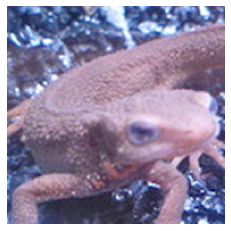

In [ ]:
def Bi_cubic(img, ax = 1.5, ay = 1.5):
    h, w, c = img.shape

    ah = int(ay * h)
    aw = int(ax * w)

    y = np.arange(ah).repeat(aw).reshape(ah, -1)
    x = np.tile(np.arange(aw), (ah, 1))

    y = (y / ay)
    x = (x / ax)

    ix = np.floor(x).astype(np.int)
    iy = np.floor(y).astype(np.int)

    ix = np.minimum(ix, w-2)
    iy = np.minimum(iy, h-2)

    dx2 = x - ix
    dy2 = y - iy
    dx1 = dx2 + 1
    dy1 = dy2 + 1
    dx3 = 1 - dx2
    dy3 = 1 - dy2
    dx4 = 1 + dx3
    dy4 = 1 + dy3
    
    dx = [dx1, dx2, dx3, dx4]
    dy = [dy1, dy2, dy3, dy4]
    
    out = np.zeros((ah, aw, c), dtype=np.float)
    sum = out.copy()

    def calc_weight(t):
        a = -1.
        at = np.abs(t)
        w = np.zeros_like(t)
        ind = np.where(at <= 1)
        w[ind] = ((a+2) * np.power(at, 3) - (a+3) * np.power(at, 2) + 1)[ind]
        ind = np.where((at > 1) & (at <= 2))
        w[ind] = (a*np.power(at, 3) - 5*a*np.power(at, 2) + 8*a*at - 4*a)[ind]
        return w

    for j in range(-1, 3):
        for i in range(-1, 3):
            ind_x = np.minimum(np.maximum(ix + i, 0), w-1)
            ind_y = np.minimum(np.maximum(iy + j, 0), h-1)
            
            wx = calc_weight(dx[i+1])
            wy = calc_weight(dyl[j+1])
            wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
            wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)
            
            sum += wx * wy
            out += wx * wy * img[ind_y, ind_x]

    out /= sum

    out = (np.clip(out, 0, 255)).astype(np.uint8)
    return out

out = Bi_cubic(img_orig)
print(img_orig.shape, out.shape)
show(out)

# Q.28. アフィン変換(平行移動)
アフィン変換を利用して画像をx方向に+30、y方向に-30だけ平行移動させよ。

アフィン変換とは3x3の行列を用いて画像の変換を行う操作である。

変換は(1)平行移動(Q.28) (2)拡大縮小(Q.29) (3)回転(Q.30) (4)スキュー(Q.31) がある。

In [118]:
def Affine(img2, a=1, b=0, c=0, d=1, tx = 30, ty = -30):
    H, W, C = img2.shape

    img = np.zeros((H+2, W+2, C), dtype=np.float32)
    img[1:H+1, 1:W+1] = img2
    # print(img)

    H1 = np.round(H * d).astype(np.int)
    W1 = np.round(W * a).astype(np.int)
    out = np.zeros((H1+1, W1+1, C), dtype=np.float32)

	# get position of new image
    x1 = np.tile(np.arange(W1), (H1, 1))
    y1 = np.arange(H1).repeat(W1).reshape(H1, -1)

	# get position of original image by affine
    adbc = a * d - b * c
    x = np.round((d * x1  - b * y1) / adbc).astype(np.int) - tx + 1
    y = np.round((-c * x1 + a * y1) / adbc).astype(np.int) - ty + 1
    
    x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
    y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

	# assgin pixcel to new image
    out[y1, x1] = img[y, x]

    out = out[:H1, :W1]
    out = out.astype(np.uint8)

    
    return out

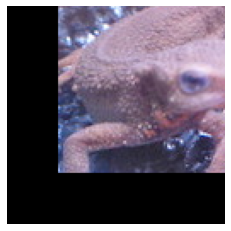

In [119]:
out = Affine(img_orig)
show(out)

# Q.29. アフィン変換(拡大縮小)
アフィン変換を用いて、(1)x方向に1.3倍、y方向に0.8倍にリサイズせよ。

また、(2) (1)の条件に加えて、x方向に+30、y方向に-30だけ平行移動を同時に実現せよ。

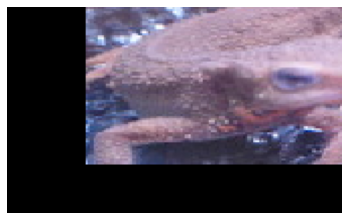

In [105]:
out = Affine(img_orig, a=1.3, d=0.8)
show(out)

# Q.30. アフィン変換(回転)
(1)アフィン変換を用いて、反時計方向に30度回転させよ。

(2) アフィン変換を用いて、反時計方向に30度回転した画像で中心座標を固定することで、なるべく黒い領域がなくなるように画像を作成せよ。 （ただし、単純なアフィン変換を行うと画像が切れてしまうので、工夫を要する。）

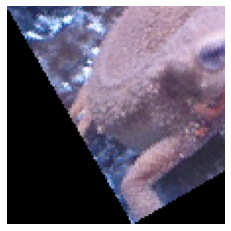

In [106]:
theta = - np.pi * 30. / 180.
out = Affine(img_orig, a=np.cos(theta), b=-np.sin(theta), c=np.sin(theta), d=np.cos(theta),
 tx=0, ty=0)
show(out)

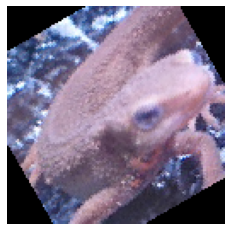

In [122]:
def affine(img2, a, b, c, d, tx, ty):
    # 引数にcがあるから小文字のc使えない
	H, W, C = img2.shape

	# temporary image
	img = np.zeros((H+2, W+2, C), dtype=np.float32)
	img[1:H+1, 1:W+1] = img2

	# get shape of new image
	H_new = np.round(H).astype(np.int)
	W_new = np.round(W).astype(np.int)
	out = np.zeros((H_new, W_new, C), dtype=np.float32)

	# get position of new image
	x_new = np.tile(np.arange(W_new), (H_new, 1))
	y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

	# get position of original image by affine
	adbc = a * d - b * c
	x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1
	y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

	# adjust center by affine
	dcx = (x.max() + x.min()) // 2 - W // 2
	dcy = (y.max() + y.min()) // 2 - H // 2

	x -= dcx
	y -= dcy

	x = np.clip(x, 0, W + 1)
	y = np.clip(y, 0, H + 1)

	# assign pixcel
	out[y_new, x_new] = img[y, x]
	out = out.astype(np.uint8)

	return out


# Affine
A = 30.
theta = - np.pi * A / 180.

out = affine(img_orig.astype(np.float), a=np.cos(theta), b=-np.sin(theta), c=np.sin(theta), d=np.cos(theta),
 tx=0, ty=0)
show(out)